In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df=pd.read_csv("Height_weight.csv")

In [49]:
df

,Height,Weight
0,45,120
1,50,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,82,186


In [50]:
df.head()

,Height,Weight
0,45,120
1,50,135
2,48,123
3,60,145
4,70,160


In [51]:
df.tail()

,Height,Weight
19,76,150
20,87,167
21,45,129
22,56,140
23,72,160


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  24 non-null     int64
 1   Weight  24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [53]:
## Remove all rows with NULL values
df.dropna(inplace = True)
df

,Height,Weight
0,45,120
1,50,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,82,186


In [54]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'WEIGHT')

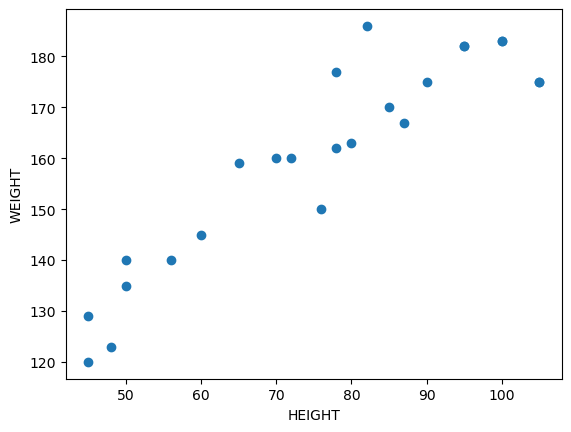

In [55]:
## scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")

Text(0.5, 0, 'WEIGHT')

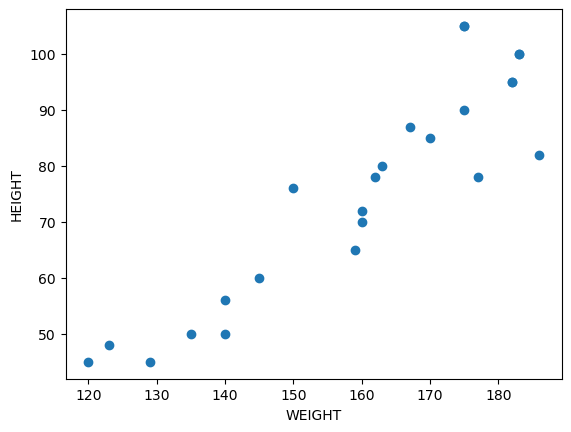

In [56]:
## scatter plot
plot=plt.scatter(df['Weight'],df['Height'])
plt.ylabel("HEIGHT")
plt.xlabel("WEIGHT")

In [57]:
## correllation
df.corr()

,Height,Weight
Height,1.000000,0.918728
Weight,0.918728,1.000000


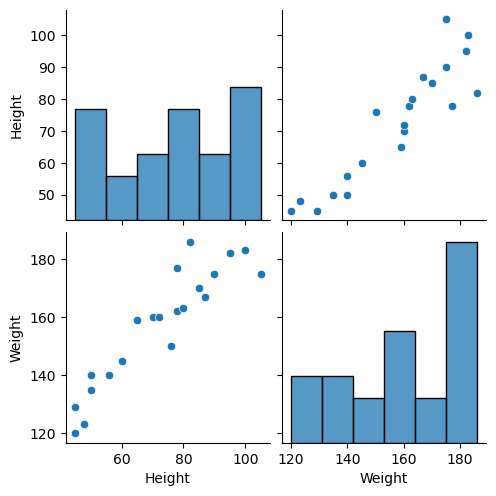

In [58]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [59]:
## independent features should be dataframe or 2d array and dependent features should be series
X=df[['Height']]
print(type(X))
y=df['Weight']
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [60]:
print(np.array(X).shape)
print(np.array(y).shape)


(24, 1)
(24,)


In [61]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [62]:
X_test.shape

(6, 1)

In [63]:
X_train.shape

(18, 1)

In [64]:
## standardization
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.58110263],
       [-1.30157068],
       [-1.56363189],
       [ 0.1659721 ],
       [-1.40639516],
       [ 1.31904142],
       [ 0.53285779],
       [-0.77744826],
       [-0.25332584],
       [-0.98709722],
       [-1.30157068],
       [ 0.63768228],
       [-0.14850135],
       [ 0.794919  ],
       [ 1.05698021],
       [ 1.31904142],
       [ 0.06114762],
       [ 0.27079658]])

In [66]:
X_test=scaler.transform(X_test)

In [67]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression

In [68]:
regression=LinearRegression(n_jobs=-1)

In [69]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [70]:
print("regression coefficient is:" ,regression.coef_)
print("regression intercept is:" ,regression.intercept_)


regression coefficient is: [17.79880915]
regression intercept is: 157.88888888888889


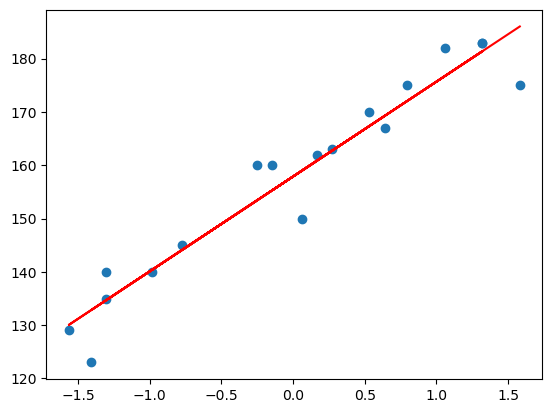

In [71]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

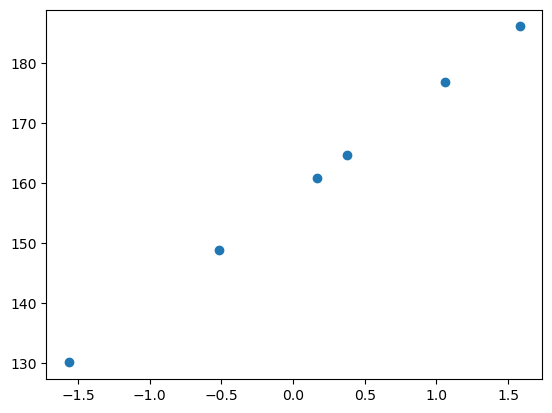

In [72]:
## prediction for test data
y_pred=regression.predict(X_test)
plt.scatter(X_test,y_pred)

### prediction of test data
1. predicted height=intercept+coef_(height)
2. y_pred_test=157.88+17.79(X_test)

In [73]:
## prediction for test data
y_pred=regression.predict(X_test)
y_pred

array([176.70187799, 160.84299462, 130.05810335, 148.71561321,
       186.03063292, 164.57449659])

In [74]:
X_test

array([[ 1.05698021],
       [ 0.1659721 ],
       [-1.56363189],
       [-0.51538705],
       [ 1.58110263],
       [ 0.37562107]])

In [75]:
## performance matrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [76]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

179.46333893861848
12.37562564472141
13.396392758448764


### r square
r2_score=1-ssr/sst
ssr=sum of residuals
sst=total sum of square

In [77]:
from sklearn.metrics import r2_score

In [78]:
score=r2_score(y_test,y_pred)

In [79]:
score

0.6436273262843916

In [80]:
adjr2=1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [81]:
adjr2

0.5545341578554894

In [82]:
## ols linear regression

In [83]:
import statsmodels.api as sm

In [84]:
model=sm.OLS(y_train,X_train).fit()

In [85]:
model.predict(X_test)

array([ 18.81298911,   2.95410573, -27.83078554,  -9.17327568,
        28.14174403,   6.6856077 ])

In [86]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.046
Method:                 Least Squares   F-statistic:                             0.2158
Date:                Fri, 06 Sep 2024   Prob (F-statistic):                       0.648
Time:                        20:40:43   Log-Likelihood:                         -116.66
No. Observations:                  18   AIC:                                      235.3
Df Residuals:                      17   BIC:                                      236.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [87]:
## prediction for new data

In [88]:
regression.predict(scaler.transform([[72]]))

array([155.24574166])